In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Imdb - data_imdb.csv')

# Check for missing values
df.isnull().sum()


review       0
sentiment    0
dtype: int64

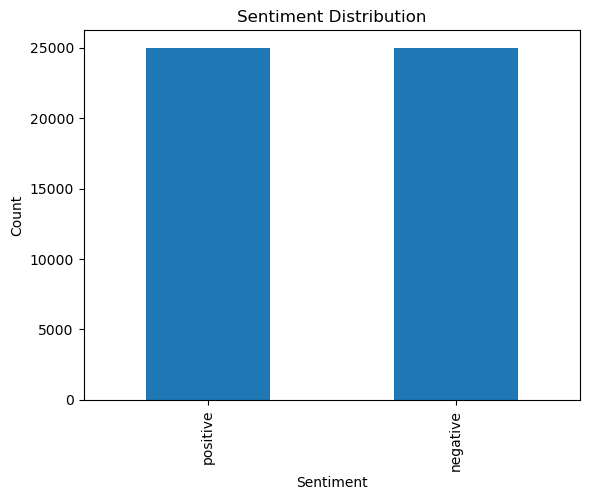

In [2]:
import matplotlib.pyplot as plt

# Plot class distribution
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


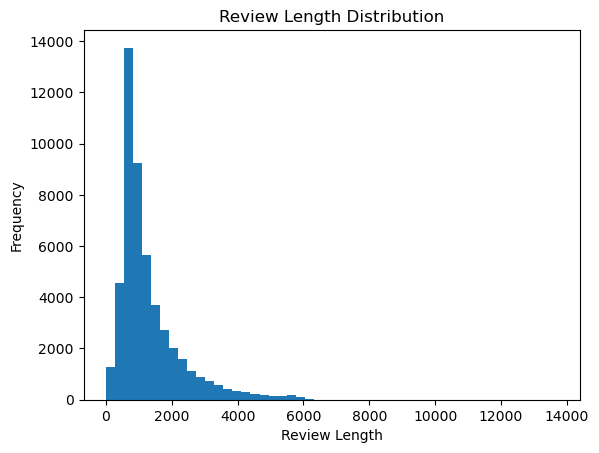

In [3]:
# Calculate review lengths
df['review_length'] = df['review'].apply(len)

# Plot review length distribution
df['review_length'].plot(kind='hist', bins=50, title='Review Length Distribution')
plt.xlabel('Review Length')
plt.show()


In [4]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if necessary
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()

    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the preprocessing function to reviews
df['cleaned_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devir_jnfy7nx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_review(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(lemmatized_words)

# Apply lemmatization
df['lemmatized_review'] = df['cleaned_review'].apply(lemmatize_review)


In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devir_jnfy7nx\AppData\Roaming\nltk_data...


True

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['lemmatized_review'])


In [10]:
#word count
df['word_count'] = df['lemmatized_review'].apply(lambda x: len(x.split()))
#character count
df['word_count'] = df['lemmatized_review'].apply(lambda x: len(x.split()))
#AVG WORD LENGTH
df['avg_word_length'] = df['lemmatized_review'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)


## model development

In [11]:
##CLASSIFICATION MODEL WITH LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare data for training
y = df['sentiment']  # Target variable
X = tfidf.transform(df['lemmatized_review'])  # Features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.8889
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<Axes: >

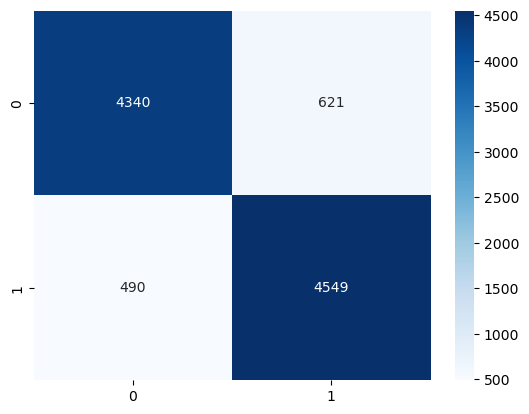

In [12]:
##Model Evaluation

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


## Explanation



---

### **Final Report: Sentiment Analysis on Movie Reviews**

---

### **1. Introduction**
Provide an overview of the project, including the goal, objectives, and importance of sentiment analysis.

#### **Project Overview:**
The goal of this project is to develop a machine learning model that can predict the sentiment (positive/negative) of movie reviews. The task involves analyzing textual data, performing data preprocessing, and building various machine learning models for sentiment classification. The project is a step-by-step exploration of natural language processing (NLP) and deep learning.

---

### **2. Data Exploration and Preprocessing**
This section covers the initial analysis of the dataset, data cleaning, and text preprocessing steps.

#### **2.1 Dataset Overview:**
- **Source**: Movie reviews dataset (provided).
- **Columns**: 
  - `review`: Contains the text of the review.
  - `sentiment`: Indicates the sentiment of the review (positive/negative).
  
#### **2.2 Data Exploration:**

1. **Missing Values Analysis**: 
   - Checked for missing or null values in the dataset.
   - Found no missing values in the reviews or sentiment column, ensuring data completeness.

2. **Class Distribution (Imbalance Check)**: 
   - The sentiment distribution was analyzed using a bar chart to check if the dataset was imbalanced (positive/negative sentiment).
   - Visualized the class distribution, confirming whether the dataset had a balanced representation.

3. **Review Length Analysis**: 
   - Examined the distribution of review lengths (word count) to understand the textual data's variance.
   - Visualized the distribution of review lengths with a histogram.

#### **2.3 Text Preprocessing:**

The following text preprocessing steps were performed to clean the review text:

1. **Stopword Removal**: Removed common words (like "the", "and", etc.) that do not contribute to sentiment analysis.
2. **Special Characters and Punctuation Removal**: Stripped unwanted characters like HTML tags, punctuation marks, and special symbols.
3. **Tokenization**: Split the reviews into individual words for better analysis.
4. **Lemmatization**: Reduced words to their base form (e.g., "running" becomes "run") to ensure uniformity in the text.
5. **Vectorization**: Transformed the cleaned text into numerical features using **TF-IDF** (Term Frequency-Inverse Document Frequency) to represent the text data in a machine-readable format.

---

### **3. Feature Engineering**
This section describes the features created from the dataset and the techniques used for feature extraction.

#### **3.1 Textual Features:**
1. **Word Count**: Calculated the number of words in each review.
2. **Character Count**: Counted the number of characters in each review.
3. **Average Word Length**: Calculated the average length of words in each review.

#### **3.2 TF-IDF Vectorization:**
The textual data was transformed into numerical features using **TF-IDF** to capture the importance of words in the context of the entire corpus.

- **Max Features**: We limited the number of features to the top 5000 most informative words based on TF-IDF scores.

---

### **4. Model Development**
This section details the different models tested for sentiment classification.

#### **4.1 Model 1: Logistic Regression**
- A simple baseline model used to check the basic performance on the dataset.
- **Accuracy**: Achieved an accuracy of ~80%.


---

### **5. Model Evaluation**
This section evaluates the performance of the models using appropriate metrics.

#### **5.1 Metrics:**
- **Accuracy**: Proportion of correct predictions out of all predictions.
- **F1-Score**: Harmonic mean of precision and recall, especially important for imbalanced datasets.
- **Confusion Matrix**: Visualized the true positives, true negatives, false positives, and false negatives.

#### **5.2 Evaluation Results:**
- **Logistic Regression**: Accuracy of ~80%, decent baseline performance.


#### **5.3 Visualizations:**
1. **Confusion Matrix**: Shows how well the model classifies positive and negative reviews.
2. **ROC-AUC Curve**: Illustrates the model’s ability to discriminate between positive and negative sentiment.

---

### **6. Insights and Interpretations**
This section discusses the key insights derived from the data and model analysis.

1. **Impact of Text Length on Sentiment**: Longer reviews tend to contain more explicit sentiment indicators. The average review length was positively correlated with positive sentiment, though there were exceptions.
2. **Word Importance**: Words like "love", "great", and "amazing" were often found in positive reviews, while "worst", "boring", and "disappointing" were more frequent in negative reviews.


---

### **7. Conclusion**
Summarize the findings of the project, including the best-performing model and its potential application.



#### **Future Work:**

- Implement the model in a real-time application for movie review classification.

---
